Simply generate some terms (100? 200?) and after it run env on e-greedy step-based policy for checking it.

In [1]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from deap import tools, base, creator
import seaborn as sns

sys.path.append("../")
from calculus.term import *
from calculus.strategy import *
from calculus.generation import *
from calculus.generation_threading import *

from calculus_utils.drawing import *
from calculus_utils.algorithms import *

from vd_env.lambda_env import LambdaEnv
from vd_env.run_greedy_policy import run_greedy_policy
from vd_env.run_e_greedy_policy import run_e_greedy_policy

In [2]:
terms_100, stepsLO_100 = gen_filtered_lambda_terms_v2(count_terms=100)
stepsRI_100 = [term.normalize(RightmostInnermostStrategy())[1] for term in terms_100]

print(f"Generated LO normalizable terms: {len(terms_100)}")
print(f"LO steps: {stepsLO_100}")
print(f"RI steps: {stepsRI_100}")
print(f"LO max: {max(stepsLO_100)}")
print(f"RI max: {max(stepsRI_100)}")

Generated LO normalizable terms: 101
LO steps: [2, 1, 5, 14, 8, 4, 8, 3, 10, 6, 6, 2, 16, 9, 3, 12, 5, 1, 11, 3, 77, 17, 1, 4, 2, 4, 4, 11, 8, 6, 10, 76, 2, 5, 6, 6, 13, 12, 6, 2, 3, 2, 6, 9, 4, 3, 3, 5, 10, 6, 3, 8, 9, 57, 10, 2, 39, 5, 8, 12, 6, 4, 14, 2, 3, 14, 1, 1, 6, 8, 36, 5, 11, 6, 9, 6, 6, 4, 3, 1, 3, 35, 11, 4, 12, 1, 3, 4, 8, 7, 10, 7, 8, 13, 18, 12, 30, 4, 12, 5, 7]
RI steps: [9, 10, 5, 16, 8, 4, 11, 9, 12, 6, 8, 9, 17, 9, 4, 13, 5, 9, 11, 9, 6, 29, 1, 7, 5, 6, 3, 8, 8, 6, 15, 24, 7, 6, 7, 8, 15, 13, 10, 6, 8, 7, 16, 14, 9, 13, 10, 10, 10, 7, 11, 10, 13, inf, 19, 2, 17, 16, 7, 10, 6, 13, 12, 4, 17, 17, 8, 3, 6, 5, 20, 5, 8, 6, 9, 7, 7, 9, 10, 6, 3, 21, 16, 4, 14, 5, 11, 4, 9, 7, 11, 7, 11, 18, 15, 18, 36, 6, 13, 5, 7]
LO max: 77
RI max: inf


In [3]:
terms_200, stepsLO_200 = gen_filtered_lambda_terms_v2(count_terms=200)
stepsRI_200 = [term.normalize(RightmostInnermostStrategy())[1] for term in terms_200]

print(f"Generated LO normalizable terms: {len(terms_200)}")
print(f"LO steps: {stepsLO_200}")
print(f"RI steps: {stepsRI_200}")
print(f"LO max: {max(stepsLO_200)}")
print(f"RI max: {max(stepsRI_200)}")

Generated LO normalizable terms: 201
LO steps: [6, 5, 6, 2, 10, 2, 3, 13, 10, 4, 8, 11, 98, 4, 6, 6, 2, 8, 8, 9, 6, 3, 32, 17, 4, 6, 20, 5, 5, 2, 10, 6, 6, 11, 3, 4, 12, 21, 8, 9, 4, 5, 1, 4, 2, 2, 2, 13, 6, 11, 15, 3, 41, 3, 4, 1, 2, 10, 5, 22, 3, 3, 14, 8, 9, 36, 4, 5, 15, 14, 2, 4, 7, 1, 8, 3, 5, 13, 10, 9, 8, 3, 14, 3, 10, 4, 29, 7, 10, 10, 1, 10, 6, 5, 5, 3, 5, 4, 3, 5, 4, 3, 23, 6, 5, 19, 8, 2, 7, 10, 3, 5, 6, 15, 15, 3, 16, 5, 9, 8, 1, 1, 11, 15, 1, 3, 6, 4, 5, 55, 24, 13, 5, 3, 5, 2, 4, 2, 8, 11, 3, 2, 2, 5, 2, 24, 9, 14, 22, 18, 2, 8, 17, 8, 4, 30, 11, 3, 13, 9, 7, 1, 5, 4, 2, 2, 9, 6, 4, 7, 23, 3, 4, 21, 4, 2, 4, 4, 5, 12, 5, 16, 2, 6, 1, 4, 5, 7, 2, 2, 1, 6, 4, 6, 6, 2, 23, 5, 3, 2, 9]
RI steps: [6, 5, 7, 13, 18, 6, 3, 14, 12, 18, 7, 16, 35, 6, 6, 8, 8, 11, 17, 9, 8, inf, 22, 20, 8, 10, 20, 7, 5, 5, 14, 6, 8, 13, 3, 8, 29, 29, 7, 9, 4, 6, 4, 5, 7, 7, 6, 17, 9, 13, 17, 7, 23, 3, 6, 4, 3, 13, 9, 20, 5, 3, 14, 11, 6, 8, 10, 17, 12, 16, 7, 7, 8, inf, 8, 8, 10, inf, 16, inf, 8, 3

In [4]:
max_count_steps_rlenv = 100
strategies_env = [LeftmostOutermostStrategy(), RightmostInnermostStrategy()]

explore_actions = 100
epsilon = 0.1

In [5]:
env_100 = LambdaEnv(
    strategies=strategies_env,
    lambda_terms=terms_100,
    max_step_term=max_count_steps_rlenv,
    count_terms=len(terms_100),
)

In [6]:
env_200 = LambdaEnv(
    strategies=strategies_env,
    lambda_terms=terms_200,
    max_step_term=max_count_steps_rlenv,
    count_terms=len(terms_200),
)

In [7]:
_, steps_eg_step_non_env_100 = run_e_greedy_policy(
    environment=env_100,
    exploration=explore_actions,
    max_term_reward=max_count_steps_rlenv,
    epsilon=epsilon,
    deterministic=False,
    is_action_based=True,
    return_steps=True,
)

In [8]:
_, steps_eg_step_non_env_200 = run_e_greedy_policy(
    environment=env_200,
    exploration=explore_actions,
    max_term_reward=max_count_steps_rlenv,
    epsilon=epsilon,
    deterministic=False,
    is_action_based=True,
    return_steps=True,
)

In [9]:
print(f"steps e-greedy 100: {steps_eg_step_non_env_100}")

steps e-greedy 100: [3, 1, 5, 15, 8, 4, 8, 6, 13, 6, 8, 3, 17, 9, 4, 18, 5, 2, 13, 6, 6, 31, 1, 7, 3, 6, 4, 8, 8, 8, 13, 80, 2, 6, 6, 8, 15, 19, 9, 2, 8, 7, 11, 16, 7, 4, 4, 10, 12, 7, 3, 10, 14, 99, 15, 2, 23, 6, 8, 12, 6, 8, 19, 2, 5, 17, 1, 1, 6, 8, 25, 5, 12, 6, 9, 8, 7, 9, 6, 1, 3, 34, 16, 4, 16, 1, 8, 4, 9, 7, 11, 7, 11, 24, 18, 11, 37, 4, 18, 5, 7]


In [10]:
print(f"steps e-greedy 100: {steps_eg_step_non_env_200}")

steps e-greedy 100: [6, 5, 6, 3, 17, 3, 3, 22, 17, 8, 9, 14, 84, 6, 6, 6, 2, 8, 9, 10, 12, 6, 22, 16, 8, 6, 20, 5, 5, 2, 14, 6, 8, 14, 3, 8, 20, 28, 7, 15, 4, 6, 2, 5, 3, 3, 3, 16, 6, 21, 18, 7, 37, 3, 4, 2, 3, 10, 7, 29, 9, 3, 25, 11, 6, 16, 7, 7, 12, 18, 5, 4, 8, 7, 12, 4, 6, 20, 18, 14, 8, 3, 14, 5, 14, 4, 28, 7, 11, 12, 3, 15, 6, 5, 5, 4, 11, 5, 4, 5, 5, 3, 20, 7, 7, 14, 7, 2, 7, 11, 5, 9, 7, 20, 14, 5, 16, 7, 10, 11, 3, 2, 11, 27, 2, 3, 10, 8, 10, 44, 18, 14, 5, 3, 5, 2, 4, 2, 9, 12, 6, 7, 2, 5, 4, 21, 10, 6, 29, 20, 2, 9, 15, 8, 5, 50, 11, 4, 13, 11, 7, 1, 6, 7, 5, 2, 9, 8, 5, 9, 31, 7, 4, 23, 4, 2, 6, 5, 12, 12, 10, 13, 2, 7, 4, 4, 5, 11, 5, 2, 1, 6, 4, 6, 6, 2, 24, 7, 6, 2, 9]


In [11]:
weights_history_100 = env_100.get_weights_history()
weights_history_200 = env_200.get_weights_history()

In [12]:
print(f"weights history 100: {weights_history_100}")

weights history 100: [array([0.46559786, 0.53440214]), array([0.46666667, 0.53333333]), array([0.46636771, 0.53363229]), array([0.4660804, 0.5339196]), array([0.46580407, 0.53419593]), array([0.46553809, 0.53446191]), array([0.46656145, 0.53343855]), array([0.46263612, 0.53736388]), array([0.46366145, 0.53633855]), array([0.46317657, 0.53682343]), array([0.46416145, 0.53583855]), array([0.46393162, 0.53606838]), array([0.46487846, 0.53512154]), array([0.46578947, 0.53421053]), array([0.46535283, 0.53464717]), array([0.46110236, 0.53889764]), array([0.46204978, 0.53795022]), array([0.46296296, 0.53703704]), array([0.46384375, 0.53615625]), array([0.46469382, 0.53530618]), array([0.46077862, 0.53922138]), array([0.46165929, 0.53834071]), array([0.46230323, 0.53769677]), array([0.46210269, 0.53789731]), array([0.46190858, 0.53809142]), array([0.46273169, 0.53726831]), array([0.46352819, 0.53647181]), array([0.46429935, 0.53570065]), array([0.46411124, 0.53588876]), array([0.4648582, 0.535

In [13]:
print(f"weights history 200: {weights_history_200}")

weights history 200: [array([0.48846321, 0.51153679]), array([0.48805461, 0.51194539]), array([0.48766207, 0.51233793]), array([0.48728466, 0.51271534]), array([0.48795181, 0.51204819]), array([0.48758865, 0.51241135]), array([0.48822848, 0.51177152]), array([0.48884266, 0.51115734]), array([0.48849295, 0.51150705]), array([0.49291628, 0.50708372]), array([0.49350649, 0.50649351]), array([0.49309245, 0.50690755]), array([0.49269311, 0.50730689]), array([0.49326054, 0.50673946]), array([0.4928751, 0.5071249]), array([0.49250288, 0.50749712]), array([0.4921432, 0.5078568]), array([0.49268913, 0.50731087]), array([0.49234136, 0.50765864]), array([0.49136391, 0.50863609]), array([0.49158394, 0.50841606]), array([0.48723799, 0.51276201]), array([0.48781854, 0.51218146]), array([0.4875224, 0.5124776]), array([0.4872352, 0.5127648]), array([0.48695652, 0.51304348]), array([0.486686, 0.513314]), array([0.48642328, 0.51357672]), array([0.48672789, 0.51327211]), array([0.48647978, 0.51352022]), 

In [15]:
print(weights_history_100[0])

[0.46559786 0.53440214]


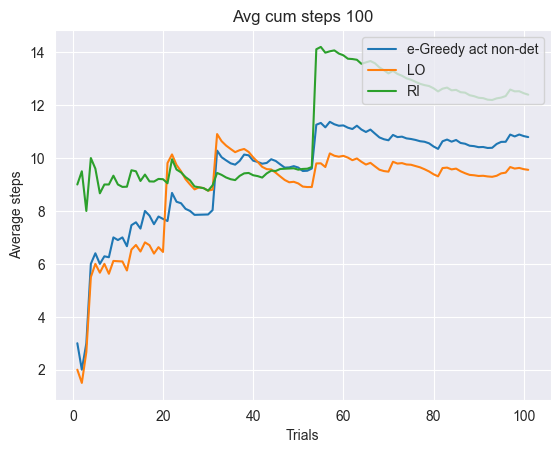

In [20]:
comp_data = {
    "e-Greedy act non-det": (steps_eg_step_non_env_100, "-"),
    "LO": (stepsLO_100, "-"),
    "RI": ([steps if steps != np.inf else 250 for steps in stepsRI_100], "-"),
}

draw_cumulative_avg_comparison(comp_data, title="Avg cum steps 100")

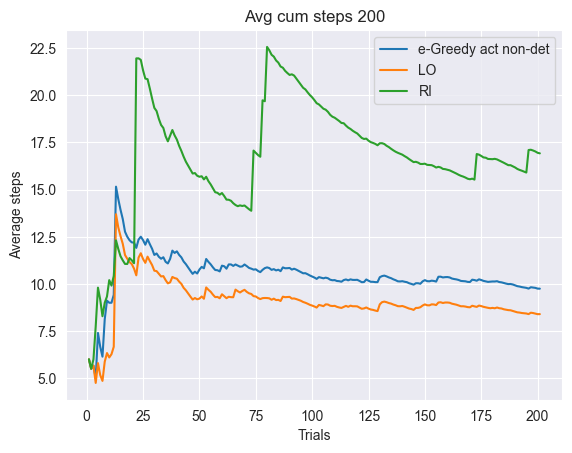

In [21]:
comp_data = {
    "e-Greedy act non-det": (steps_eg_step_non_env_200, "-"),
    "LO": (stepsLO_200, "-"),
    "RI": ([steps if steps != np.inf else 250 for steps in stepsRI_200], "-"),
}

draw_cumulative_avg_comparison(comp_data, title="Avg cum steps 200")

In [19]:
from scipy.stats import iqr


def get_outliers(x, axis=0, bar=1.5):
    d_iqr = iqr(x, axis=axis)
    d_q3 = np.percentile(x, 95, axis=axis)
    iqr_distance = np.multiply(d_iqr, bar)

    stat_shape = list(x.shape)
    stat_shape[axis] = 1

    upper_range = d_q3 + iqr_distance
    upper_outlier = np.greater(x - upper_range.reshape(stat_shape), 0)

    return [False if res else True for res in upper_outlier]


def clear_arr(arr):
    return np.array(arr)[get_outliers(np.array(arr))]

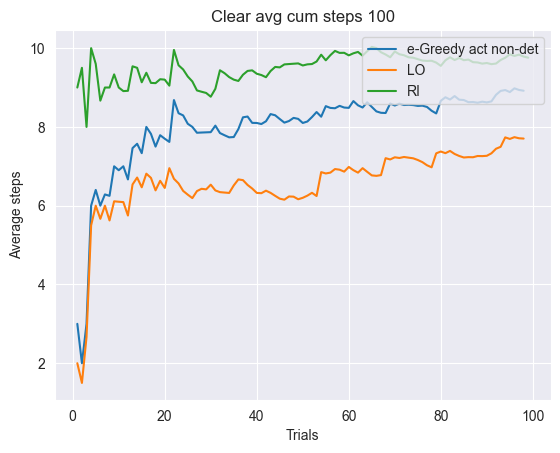

In [22]:
comp_data = {
    "e-Greedy act non-det": (clear_arr(steps_eg_step_non_env_100), "-"),
    "LO": (clear_arr(stepsLO_100), "-"),
    "RI": (clear_arr(stepsRI_100), "-"),
}

draw_cumulative_avg_comparison(comp_data, title="Clear avg cum steps 100")

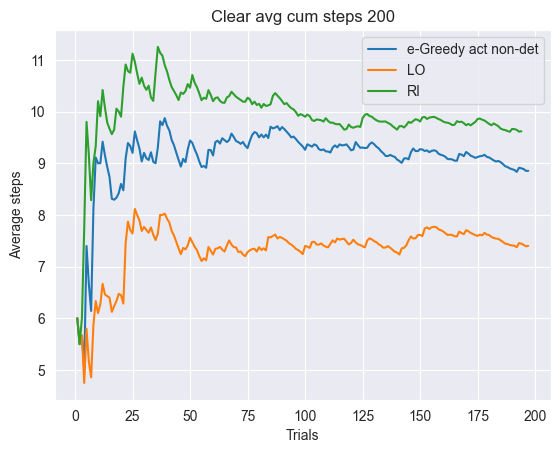

In [23]:
comp_data = {
    "e-Greedy act non-det": (clear_arr(steps_eg_step_non_env_200), "-"),
    "LO": (clear_arr(stepsLO_200), "-"),
    "RI": (clear_arr(stepsRI_200), "-"),
}

draw_cumulative_avg_comparison(comp_data, title="Clear avg cum steps 200")

In [24]:
wh_100 = np.array(weights_history_100)
wh_200 = np.array(weights_history_200)

In [25]:
print(wh_100)

[[0.46559786 0.53440214]
 [0.46666667 0.53333333]
 [0.46636771 0.53363229]
 ...
 [0.49725734 0.50274266]
 [0.49721982 0.50278018]
 [0.49725927 0.50274073]]


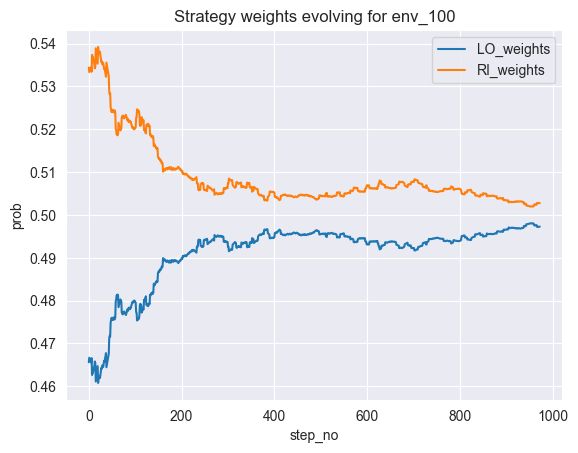

In [27]:
plt.plot(range(len(wh_100)), wh_100[:, 0], "-", label="LO_weights")
plt.plot(range(len(wh_100)), wh_100[:, 1], "-", label="RI_weights")

plt.xlabel("step_no")
plt.ylabel("prob")
plt.title("Strategy weights evolving for env_100")
plt.legend(loc="upper right")
plt.show()

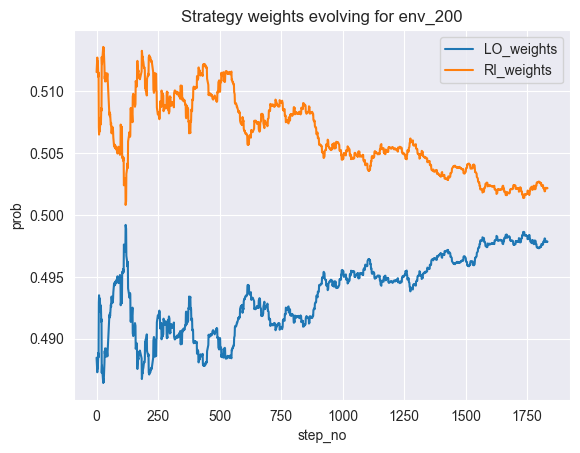

In [28]:
plt.plot(range(len(wh_200)), wh_200[:, 0], "-", label="LO_weights")
plt.plot(range(len(wh_200)), wh_200[:, 1], "-", label="RI_weights")

plt.xlabel("step_no")
plt.ylabel("prob")
plt.title("Strategy weights evolving for env_200")
plt.legend(loc="upper right")
plt.show()